In [ ]:
import sys # for automation and parallelisation
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])
if manual:
    %matplotlib inline

In [1]:
import pandas as pd
import numpy as np

# Preparation of estimation data
This notebook prepares value of time (VoT) data for mode choice estimation and modelling.

In [2]:
input_path = '../input/'

For definition of generalised cost functions, travel time and monetary travel expenditures must have the same dimension. Most commonly, time units are chosen by dividing the monetary cost term by the VoT. VoT data comes from previous studies or estimations. This notebook takes distance-dependent VoT from research undertaken within the Federal Government's transport study "Bundesverkehrswegeplan 2030": Axhausen et al. 2015. Ermittlung von Bewertungsansätzen für Reisezeiten und Zuverlässigkeit auf der Basis eines Modells für modale Verlagerungen im nicht-gewerblichen und gewerblichen Personenverkehr für die Bundesverkehrswegeplanung

In [25]:
# VoT from literature, distance-dependent, Axhausen et al. 2015, pp. 116-120
# Mapping of trip purposes: Fz1=Arbeit; Fz2=Ausbildung; Fz3=Einkauf; Fz4=Gewerblicher Weg; Fz6=Freizeit
vot = pd.DataFrame(index=[0,10,20,30,40,50,60,70,80,90,100,125,150,175,200,225,250,300,350,400,450,500],
                   data={('root', 'all'): [4.27,4.77,6.73,7.88,8.89,9.54,10.12,10.59,11.06,11.38,11.94,12.58,13.37,13.87,14.23,14.55,15.02,15.67,16.13,16.55,16.97,17.92],
                         ('Fz1', 'all'): [4.12,4.82,6.67,7.75,8.70,9.31,9.86,10.3,10.74,11.03,11.56,12.16,12.91,13.38,13.72,14.01,14.46,15.07,15.5,15.89,16.3,17.18],
                         ('Fz2', 'all'): [3.86,4.14,5.04,5.96,7.13,8.1,9.18,9.18,9.18,9.18,9.18,9.18,9.18,9.18,9.18,9.18,9.18,9.18,9.18,9.18,9.18,9.18],
                         ('Fz3', 'all'): [3.95,6.22,8.3,9.52,10.6,11.28,11.9,11.9,11.9,11.9,11.9,11.9,11.9,11.9,11.9,11.9,11.9,11.9,11.9,11.9,11.9,11.9],
                         ('Fz4', 'all'): [4.54,6.71,8.34,9.31,10.19,10.77,11.31,11.75,12.2,12.51,13.08,13.75,14.64,15.23,15.68,16.08,16.72,17.67,18.37,19.07,19.83,21.79],
                         ('Fz6', 'all'): [3.46,5.04,6.34,7.1,7.77,8.19,8.58,8.89,9.2,9.41,9.78,10.2,10.72,11.05,11.29,11.5,11.81,12.24,12.54,12.82,13.1,13.73],
                         ('root', 'PT'): [3.86,4.09,5.50,6.33,7.06,7.53,7.95,8.29,8.63,8.85,9.26,9.72,10.29,10.65,10.91,11.14,11.48,11.95,12.28,12.58,12.89,13.57],
                         ('Fz1', 'PT'): [3.82,4.20,5.15,5.71,6.2,6.51,6.8,7.02,7.25,7.40,7.67,7.98,8.37,8.61,8.79,8.94,9.17,9.49,9.70,9.91,10.12,10.57],
                         ('Fz2', 'PT'): [2.57,3.57,4.56,5.75,7.36,8.73,10.28,11.76,13.48,13.48,13.48,13.48,13.48,13.48,13.48,13.48,13.48,13.48,13.48,13.48,13.48,13.48],
                         ('Fz3', 'PT'): [5.58,8.70,9.64,10.19,10.67,10.98,11.26,11.49,11.71,11.86,12.13,12.44,12.82,13.06,13.23,13.38,13.61,13.92,14.14,14.34,14.55,15.00],
                         ('Fz4', 'PT'): [3.75,5.14,6.42,7.24,8.02,8.56,9.08,9.52,9.99,10.32,10.96,11.76,12.86,13.66,14.27,14.85,15.8,17.28,18.42,19.61,20.95,24.6],
                         ('Fz6', 'PT'): [4.00,4.24,5.26,5.85,6.38,6.71,7.02,7.26,7.50,7.67,7.96,8.29,8.70,8.96,9.15,9.31,9.55,9.89,10.13,10.34,10.57,11.06],
                         ('root', 'air'): [19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,21.79,25.75,31.19,34.95,38.46,42.03,49.91],
                         ('Fz1', 'air'): [19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,21.79,25.75,31.19,34.95,38.46,42.03,49.91],
                         ('Fz2', 'air'): [19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,21.79,25.75,31.19,34.95,38.46,42.03,49.91],
                         ('Fz3', 'air'): [19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,19.16,21.79,25.75,31.19,34.95,38.46,42.03,49.91],
                         ('Fz4', 'air'): [24.47,24.47,24.47,24.47,24.47,24.47,24.47,24.47,24.47,24.47,24.47,24.47,24.47,24.47,24.47,25.86,27.25,32.06,37.7,45.09,54.91,89.12],
                         ('Fz6', 'air'): [15.83,15.83,15.83,15.83,15.83,15.83,15.83,15.83,15.83,15.83,15.83,15.83,15.83,15.83,15.83,16.69,18.06,20.09,21.6,23.12,24.78,29.06],
                         ('root', 'car'): [3.88,5.07,6.97,8.08,9.05,9.68,10.24,10.69,11.15,11.45,11.99,12.61,13.37,13.86,14.21,14.51,14.97,15.60,16.03,16.44,16.85,17.77],
                         ('Fz1', 'car'): [3.78,5.14,6.9,7.93,8.84,9.41,9.94,10.36,10.78,11.06,11.56,12.14,12.84,13.29,13.62,13.90,14.32,14.91,15.31,15.69,16.07,16.92],
                         ('Fz2', 'car'): [3.53,4.11,5.11,5.69,6.21,6.54,6.83,7.07,7.31,7.47,7.75,8.08,8.48,8.74,8.92,9.08,9.32,9.65,9.88,10.10,10.31,10.79],
                         ('Fz3', 'car'): [4.22,7.39,9.67,11.00,12.17,12.92,13.60,14.15,14.69,15.06,15.71,16.45,17.37,17.95,18.37,18.74,19.29,20.05,20.57,21.06,21.55,22.65],
                         ('Fz4', 'car'): [4.53,6.65,8.36,9.37,10.26,10.84,11.36,11.79,12.22,12.5,13.02,13.62,14.38,14.87,15.22,15.54,16.03,16.71,17.2,17.67,18.16,19.32],
                         ('Fz6', 'car'): [3.46,5.04,6.34,7.10,7.77,8.19,8.58,8.89,9.20,9.41,9.78,10.20,10.72,11.05,11.29,11.50,11.81,12.24,12.54,12.82,13.10,13.73]})

<AxesSubplot:>

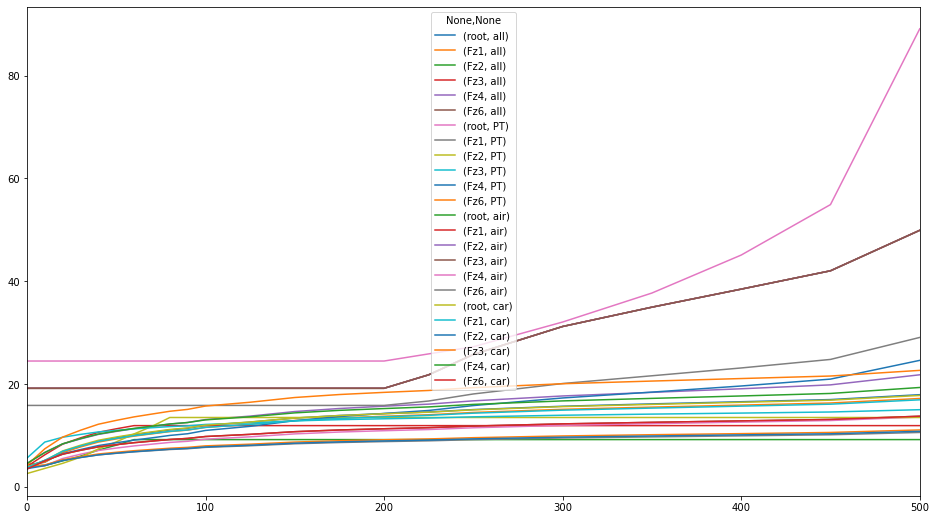

In [27]:
if manual: vot.plot(figsize=(16,9))

## Try the best fit

<AxesSubplot:>

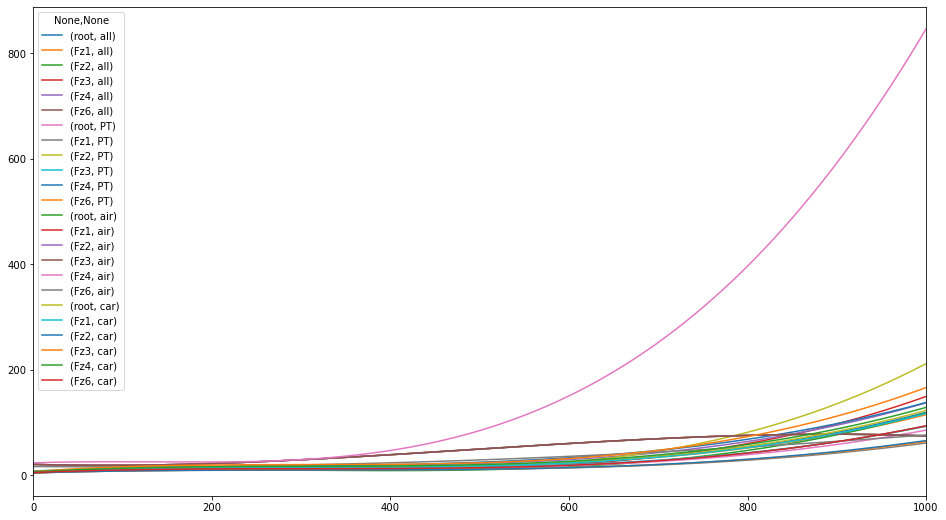

In [54]:
# All polynomials have a misfitting behaviour over 500km
if manual:
    funcs = [np.poly1d(np.polyfit(vot.index, list(vot[col]), 3)) for col in vot.columns]
    x = 1001
    funcs = pd.DataFrame(index=range(x), data=
                         {vot.columns[i]: [funcs[i](j) for j in range(x)] for i in range(len(funcs))})
    funcs.plot(figsize=(16,9))

<AxesSubplot:>

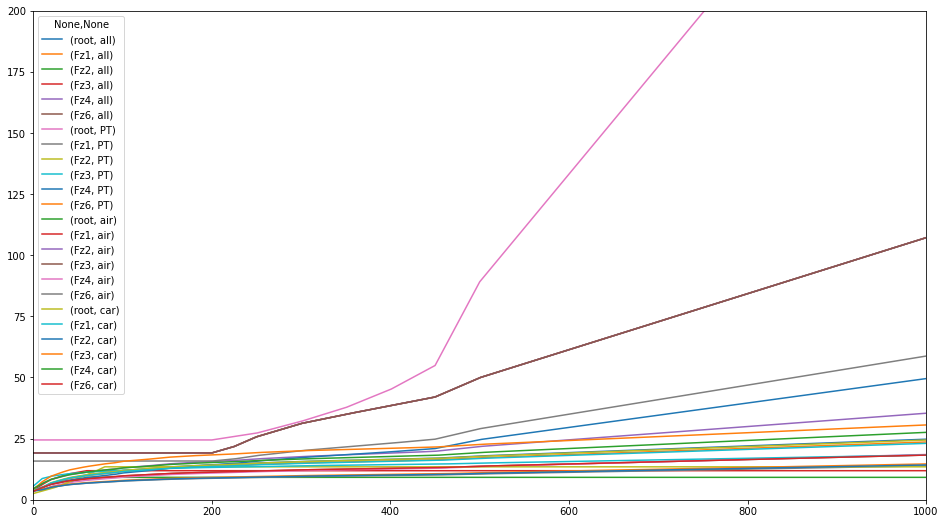

In [52]:
# Try linear interpolation
vot_long = vot.copy()
for i in range(1001):
    if i not in list(vot.index):
        vot_long.loc[i] = [np.nan for j in range(len(vot.columns))]
# Assume a linear increase of VoT for distances above 500km
# being equal the slope of the last 100km (400 to 500km)
vot_long.loc[1000] = [vot.loc[500, col] + (vot.loc[500, col]-vot.loc[400, col]) * 5
                      for col in vot.columns]
vot_long = vot_long.sort_index().interpolate()
vot_long.plot(figsize=(16,9), ylim=(0,200))

In [53]:
# Save
vot_long.to_csv(input_path + 'vot.csv')